# TOTA spending data.  

This notebook explores the spending data and potential visualizations.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import numpy as np
import math
import seaborn as sns

In [3]:
df = pd.read_csv('../data/spending_data_2018_2021_complete.csv')

df.head(20)

,Date,ITS Spend Category Name,Origin Tourism Region,Destination Tourism Region,Spend,Destination Province,Benchmark,Origin Country,Origin Country / Province,Year
0,2019-11-01,Clothes and Gifts,Kawartha and Northumberland,Rest of Newfoundland,3.146432e+03,Newfoundland and Labrador,Final,Canada,Ontario,2019
1,2019-12-01,Clothes and Gifts,Kawartha and Northumberland,Rest of Newfoundland,4.056945e+03,Newfoundland and Labrador,Final,Canada,Ontario,2019
2,2019-10-01,Clothes and Gifts,Kawartha and Northumberland,Rest of Newfoundland,3.507175e+03,Newfoundland and Labrador,Final,Canada,Ontario,2019
3,2018-04-01,Transportation,Fundy,River Valley,7.663258e+06,New Brunswick,Final,Canada,New Brunswick,2018
4,2018-05-01,Transportation,Fundy,River Valley,9.388367e+06,New Brunswick,Final,Canada,New Brunswick,2018
5,2018-06-01,Transportation,Fundy,River Valley,9.499675e+06,New Brunswick,Final,Canada,New Brunswick,2018
6,2018-08-01,Clothes and Gifts,Miramichi,Alberni-Clayoquot,0.000000e+00,British Columbia,Final,Canada,New Brunswick,2018
7,2018-07-01,Clothes and Gifts,Miramichi,Alberni-Clayoquot,0.000000e+00,British Columbia,Final,Canada,New Brunswick,2018
8,2018-09-01,Clothes and Gifts,Miramichi,Alberni-Clayoquot,0.000000e+00,British Columbia,Final,Canada,New Brunswick,2018
9,2020-09-01,Food and Beverage,Haliburton Highlands and the Ottawa Valley,Rest of Newfoundland,1.115483e+02,Newfoundland and Labrador,Final,Canada,Ontario,2020


## Check if all data is correct. 
- Provinces / Regions names
- Repeated dates?
- Equal coverage for dates / regions / category

#### Provinces / Regions names

In [3]:
df['Destination Province'].unique()

array(['Ontario', 'Northwest Territories', 'Nova Scotia', 'Manitoba',
       'British Columbia', 'Quebec', 'New Brunswick', 'Yukon', 'Nunavut',
       'Alberta', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Saskatchewan'], dtype=object)

In [4]:
df[df['Destination Province'] == 'British Columbia']['Destination Tourism Region'].unique()

array(['Alberni-Clayoquot', 'Nanaimo', 'Comox Valley',
       'Kootenay Boundary', 'Capital', 'North Okanagan',
       'Cowichan Valley', 'Greater Vancouver', 'Central Okanagan',
       'Cariboo', 'East Kootenay', 'Columbia-Shuswap', 'Central Kootenay',
       'Strathcona', 'Other Sea to Sky - Sunshine Coast', 'North Coast',
       'Whistler', 'Northern BC rural', 'Prince George',
       'Okanagan-Similkameen', 'Thompson-Nicola', 'Fraser Valley'],
      dtype=object)

**Destination regions need translation**

In [17]:
provinces = {
'Cariboo' : 'CCC',
'Capital': 'TVI',
'Alberni-Clayoquot': 'TVI',
'Nanaimo': 'TVI',
'Cowichan Valley': 'TVI',
'Comox Valley': 'TVI',
'Strathcona': 'TVI',
'Thompson-Nicola': 'TOTA',
'Central Okanagan': 'TOTA',
'North Okanagan': 'TOTA',
'Okanagan-Similkameen': 'TOTA',
'Kootenay Boundary': 'TOTA',
'Columbia-Shuswap':'KRT',
'Central Kootenay':'KRT',
'East Kootenay':'KRT',
'Northern BC rural':'NBC',
'Prince George':'NBC',
'North Coast':'NBC',
'Greater Vancouver':'VC', #These are by eye, not confirmed
'Other Sea to Sky - Sunshine Coast': 'VC',
'Whistler':'VC',
'Fraser Valley': 'VC'
}

In [18]:
df['Destination Region'] = df['Destination Tourism Region'].replace(provinces)
df[df['Destination Province'] == 'British Columbia']['Destination Region'].unique()

array(['TVI', 'TOTA', 'VC', 'CCC', 'KRT', 'NBC'], dtype=object)

## Check spending data

Group spending data to check results and ideas for visualizations

In [19]:

df['Origin'] = np.where(df['Origin Country'] == 'Canada', 'Domestic', 'International')


df[df['Destination Province'] == 'British Columbia'].groupby(['Origin', 'Year'])['Spend'].sum().reset_index()


,Origin,Year,Spend
0,Domestic,2018,1.018748e+10
1,Domestic,2019,1.015109e+10
2,Domestic,2020,6.830266e+09
3,Domestic,2021,8.630381e+09
4,International,2018,6.608703e+09
5,International,2019,6.754094e+09
6,International,2020,1.722636e+09
7,International,2021,2.546361e+09


#### Uniqueness of dates

In [12]:
df[df['Destination Province'] == 'British Columbia'].groupby(['Date', 'Benchmark'])['Year'].count()

Date        Benchmark  
2018-01-01  Final          18415
2018-02-01  Final          18415
2018-03-01  Final          18415
2018-04-01  Final          18454
2018-05-01  Final          18454
                           ...  
2021-09-01  Historic        7957
            Preliminary    10823
2021-10-01  Historic       18679
2021-11-01  Historic       18679
2021-12-01  Historic       18679
Name: Year, Length: 63, dtype: int64

In [13]:
origin='United States'
year=2021

df_plt = df[(df['Destination Province'] == 'British Columbia') & (df['Year'] == year) & (df['Origin Country'] == origin)].\
groupby(['Origin Country', 'Date', 'ITS Spend Category Name'])['Spend'].sum().reset_index()
df_plt['Month'] = df_plt['Date'].apply(lambda x: int(x[5:7]))
df_plt['Date'].unique()

array(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
       '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
       '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
      dtype=object)

## Visualizations

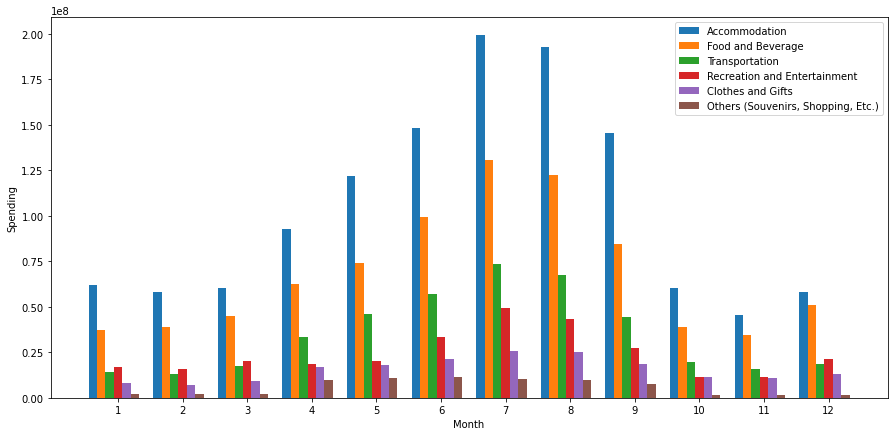

In [15]:
fig=plt.figure(figsize=(15,7))

wd = 0.13
pos = wd*-3
#cat=df_plt['ITS Spend Category Name'].unique()
cat = ['Accommodation', 'Food and Beverage','Transportation',\
       'Recreation and Entertainment', 'Clothes and Gifts', 'Others (Souvenirs, Shopping, Etc.)']


for i in range(len(cat)):
    df_ax = df_plt[df_plt['ITS Spend Category Name'] == cat[i]]
    
    plt.bar(df_ax['Month']+pos, df_ax['Spend'], wd)
    pos = pos+wd
    
plt.xticks(range(1,13))
plt.xlabel("Month")
plt.ylabel("Spending")
plt.legend(cat)
plt.show()



In [24]:
def plot_spending_item(df, origin, year):

    df_plt = df[(df['Destination Province'] == 'British Columbia') & (df['Year'] == year) & (df['Origin Country'] == origin)].\
    groupby(['Origin Country', 'Date', 'ITS Spend Category Name'])['Spend'].sum().reset_index()
    df_plt['Month'] = df_plt['Date'].apply(lambda x: int(x[5:7]))
    
    fig=plt.figure(figsize=(15,7))
    
    #max_val = df['Spend'].max()+(df['Spend'].max()*0.1)
    max_val = 200000000
    
    wd = 0.13
    pos = wd*-3
    #cat=df_plt['ITS Spend Category Name'].unique()
    cat = ['Accommodation', 'Food and Beverage','Transportation',\
           'Recreation and Entertainment', 'Clothes and Gifts', 'Others (Souvenirs, Shopping, Etc.)']
    
    
    for i in range(len(cat)):
        df_ax = df_plt[df_plt['ITS Spend Category Name'] == cat[i]]
        
        plt.bar(df_ax['Month']+pos, df_ax['Spend'], wd)
        plt.ylim((0, max_val*1.1))
        pos = pos+wd
        
    plt.xticks(range(1,13))
    plt.xlabel("Month")
    plt.ylabel("Spending")
    plt.legend(cat)
    plt.show()

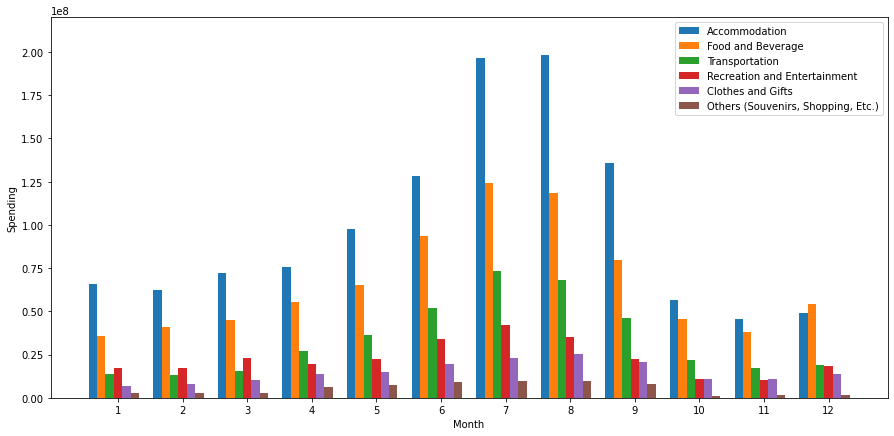

In [25]:
origin='United States'
year=2018
plot_spending_item(df, origin, year)

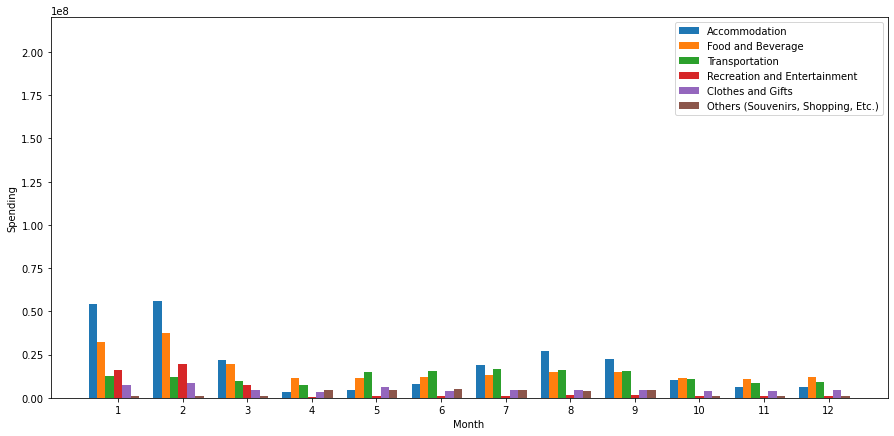

In [18]:
origin='United States'
year=2020
plot_spending_item(df, origin, year)

In [33]:
df[(df['Destination Province'] == 'British Columbia') & (df['Year'] == 2019)].groupby('Origin Country')['Spend'].sum().sort_values(ascending=False)

Origin Country
Canada            1.015109e+10
United States     3.031128e+09
Rest of World     1.126293e+09
China             7.487100e+08
United Kingdom    4.506440e+08
Australia         3.761490e+08
Germany           2.458820e+08
Mexico            2.335320e+08
Japan             2.095980e+08
South Korean      1.917080e+08
France            8.739500e+07
India             5.305500e+07
Name: Spend, dtype: float64

In [70]:
def plot_spending_country(df, year, domestic=False):
    
    group_origin = {'Mexico':'Rest of World', 'Japan':'Rest of World',
                    'South Korean':'Rest of World', 'France':'Rest of World', 'India':'Rest of World'}

    df_plt = df[(df['Destination Province'] == 'British Columbia') & (df['Year'] == year)].\
    groupby(['Origin Country', 'Date'])['Spend'].sum().reset_index()
    df_plt['Month'] = df_plt['Date'].apply(lambda x: int(x[5:7]))
    
    df_plt['Origin Country'].replace(group_origin, inplace = True)                
    
    if domestic:
        df_plt = df_plt[df_plt['Origin Country'] == 'Canada']
        max_val = 2000000000
        wd = 0.5
        pos = 0
    else:
        df_plt = df_plt[df_plt['Origin Country'] != 'Canada']
        max_val = 450000000
        wd = 0.1
        pos = wd*-3
    
    cat=df_plt['Origin Country'].unique()

    
    fig=plt.figure(figsize=(15,7))
    
    for i in range(len(cat)):
        df_ax = df_plt[df_plt['Origin Country'] == cat[i]]
        
        plt.bar(df_ax['Month']+pos, df_ax['Spend'], wd)
        plt.ylim((0, max_val*1.1))
        pos = pos+wd
        
    plt.xticks(range(1,13))
    plt.xlabel("Month")
    plt.ylabel("Spending")
    plt.legend(cat)
    plt.show()

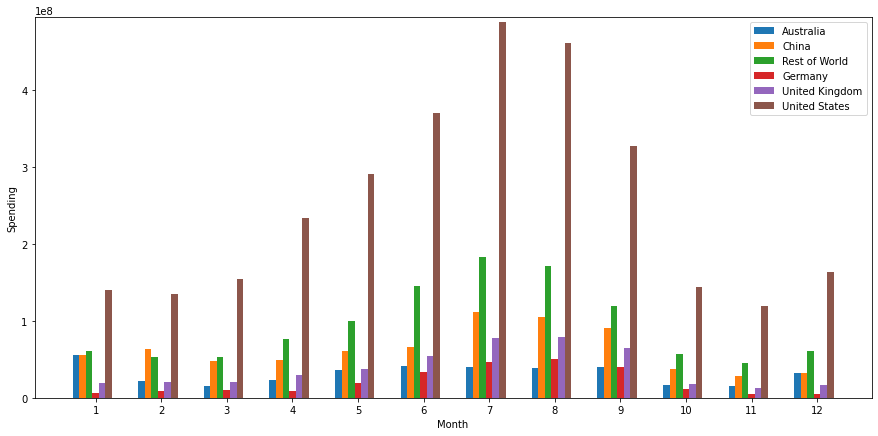

In [71]:
year=2019
domestic = False
plot_spending_country(df, year, domestic)

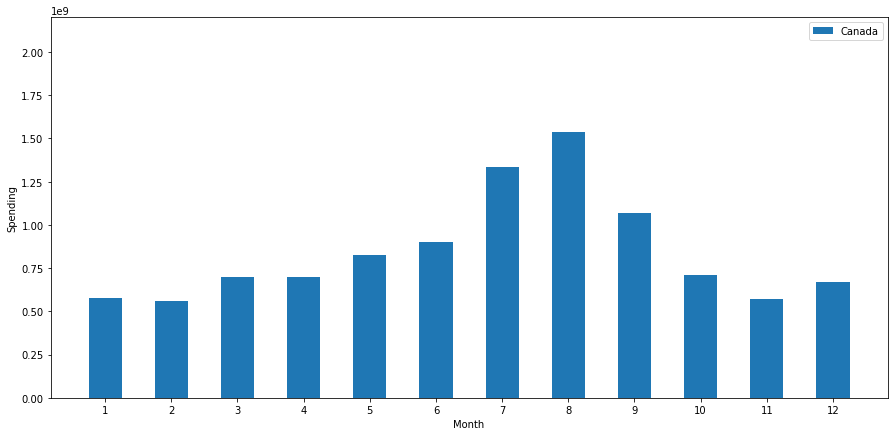

In [72]:
year=2019
domestic = True
plot_spending_country(df, year, domestic)

For BC: BC + all the lines of the destination regions  
In the regions: line for the region + all of BC

In [83]:
test_spend = df[(df['Destination Province'] == 'British Columbia') & (df['Year'] == 2019)].\
    groupby(['Origin Country', 'ITS Spend Category Name'])['Spend'].sum().to_frame()
test_spend

Spend
Origin Country ITS Spend Category Name                         
Australia      Accommodation                       1.468640e+08
               Clothes and Gifts                   3.153500e+07
               Food and Beverage                   9.421200e+07
               Others (Souvenirs, Shopping, Etc.)  4.197000e+06
               Recreation and Entertainment        6.127400e+07
...                                                         ...
United States  Clothes and Gifts                   1.845690e+08
               Food and Beverage                   8.187620e+08
               Others (Souvenirs, Shopping, Etc.)  7.158000e+07
               Recreation and Entertainment        2.904220e+08
               Transportation                      4.212890e+08

[72 rows x 1 columns]

## PLOT 1: Total spend by estination region

In [29]:
total_prov = df[df['Destination Province'] == 'British Columbia'].groupby(['Origin','Destination Region', 'Year', 'Date'])['Spend'].sum().reset_index()
#total_prov['Destination'] = total_prov['Destination Region']
#total_prov.drop(columns=['Destination Tourism Region'], inplace = True)
total_prov.head(8)

,Origin,Destination Region,Year,Date,Spend
0,Domestic,CCC,2018,2018-01-01,2.184772e+06
1,Domestic,CCC,2018,2018-02-01,2.165907e+06
2,Domestic,CCC,2018,2018-03-01,2.752986e+06
3,Domestic,CCC,2018,2018-04-01,3.183360e+06
4,Domestic,CCC,2018,2018-05-01,3.873401e+06
5,Domestic,CCC,2018,2018-06-01,4.007645e+06
6,Domestic,CCC,2018,2018-07-01,8.069555e+06
7,Domestic,CCC,2018,2018-08-01,8.549513e+06


In [30]:
total_bc = df[df['Destination Province'] == 'British Columbia'].groupby(['Origin', 'Year','Date'])['Spend'].sum().reset_index()
total_bc['Destination Region'] = 'All British Columbia'
total_bc.head(8)

,Origin,Year,Date,Spend,Destination Region
0,Domestic,2018,2018-01-01,5.949752e+08,All British Columbia
1,Domestic,2018,2018-02-01,6.003534e+08,All British Columbia
2,Domestic,2018,2018-03-01,7.567044e+08,All British Columbia
3,Domestic,2018,2018-04-01,6.619309e+08,All British Columbia
4,Domestic,2018,2018-05-01,8.114002e+08,All British Columbia
5,Domestic,2018,2018-06-01,8.550119e+08,All British Columbia
6,Domestic,2018,2018-07-01,1.436786e+09,All British Columbia
7,Domestic,2018,2018-08-01,1.530559e+09,All British Columbia


In [31]:
total_combined = pd.concat([total_bc, total_prov])
total_combined

,Origin,Year,Date,Spend,Destination Region
0,Domestic,2018,2018-01-01,5.949752e+08,All British Columbia
1,Domestic,2018,2018-02-01,6.003534e+08,All British Columbia
2,Domestic,2018,2018-03-01,7.567044e+08,All British Columbia
3,Domestic,2018,2018-04-01,6.619309e+08,All British Columbia
4,Domestic,2018,2018-05-01,8.114002e+08,All British Columbia
...,...,...,...,...,...
571,International,2021,2021-08-01,2.797901e+08,VC
572,International,2021,2021-09-01,2.906260e+08,VC
573,International,2021,2021-10-01,1.128416e+08,VC
574,International,2021,2021-11-01,1.130371e+08,VC


In [53]:
def plot_spending_total(my_df, year):
    


    df_plt = my_df[(my_df['Year'] == year)]
    df_plt['Month'] = df_plt['Date'].apply(lambda x: int(x[5:7]))

    
    cat=df_plt['Destination Region'].unique()

    
    fig=plt.figure(figsize=(15,7))
    max_val = df_plt['Spend'].max()
    
    for i in range(len(cat)):
        df_ax = df_plt[df_plt['Destination Region'] == cat[i]]
        
        plt.plot(df_ax['Month'], df_ax['Spend'])
        plt.ylim((0, max_val*1.1))
        
    #plt.xticks(range(1,13))
    #plt.xlabel("Month")
    #plt.ylabel("Spending")
    plt.legend(cat)
    plt.show()

/var/folders/wf/_wlxc6cn5js4hh3j7j6x28f80000gn/T/ipykernel_1912/2526411006.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plt['Month'] = df_plt['Date'].apply(lambda x: int(x[5:7]))


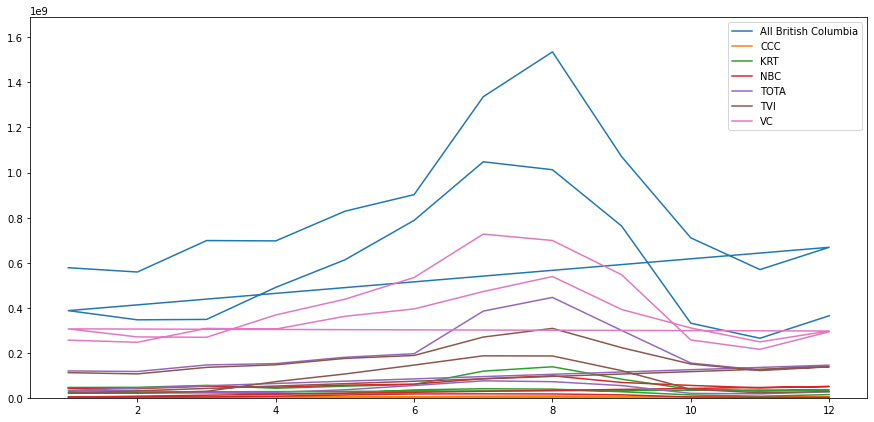

In [54]:
year=2019
plot_spending_total(total_combined, year)

## PLOT 2: Total Domestic vs International

In [55]:
total_combined.head()

,Origin,Year,Date,Spend,Destination Region
0,Domestic,2018,2018-01-01,5.949752e+08,All British Columbia
1,Domestic,2018,2018-02-01,6.003534e+08,All British Columbia
2,Domestic,2018,2018-03-01,7.567044e+08,All British Columbia
3,Domestic,2018,2018-04-01,6.619309e+08,All British Columbia
4,Domestic,2018,2018-05-01,8.114002e+08,All British Columbia


In [76]:
def plot_spending_domestic_international(my_df, year, destination="All"):
    
    if destination == 'All':
        destination = 'All British Columbia'
    df_plt = my_df[(my_df['Year'] == year) & (my_df['Destination Region'] == destination)] 
    df_plt['Month'] = df_plt['Date'].apply(lambda x: int(x[5:7]))               
    
    
    cat=df_plt['Origin'].unique()

    
    fig=plt.figure(figsize=(15,7))
    wd = 0.3
    #pos = wd*-1
    max_val = df_plt['Spend'].max()

    df_ax = df_plt[df_plt['Origin'] == "Domestic"]
    plt.bar(df_ax['Month']-wd/2, df_ax['Spend'], wd)
    df_ax = df_plt[df_plt['Origin'] == "International"]
    plt.bar(df_ax['Month']+wd/2, df_ax['Spend'], wd)

    plt.ylim((0, max_val*1.1))
        
    plt.xticks(range(1,13))
    plt.xlabel("Month")
    plt.ylabel("Spending")
    plt.legend(cat)
    plt.show()

/var/folders/wf/_wlxc6cn5js4hh3j7j6x28f80000gn/T/ipykernel_1912/3511681627.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plt['Month'] = df_plt['Date'].apply(lambda x: int(x[5:7]))


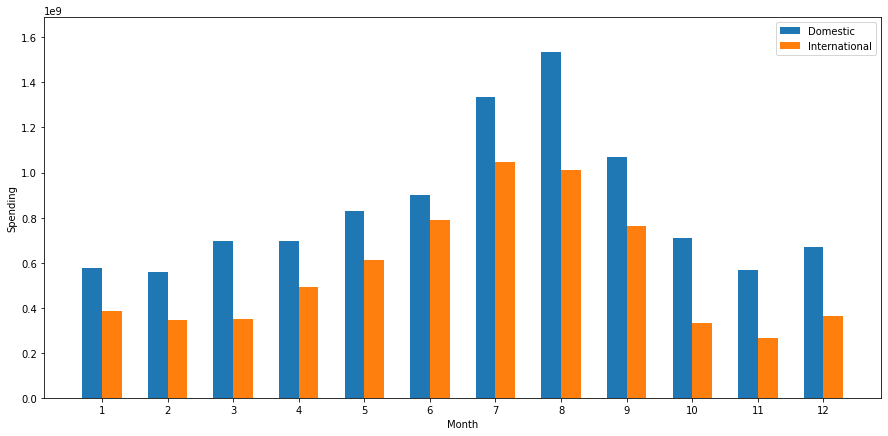

In [77]:
year=2019
plot_spending_domestic_international(total_combined, year)

## PLOT 3: Spending by market (domestic and international)

In [80]:
df['Origin Country / Province'].unique()

array(['Ontario', 'New Brunswick', 'Quebec', 'Manitoba', 'Nova Scotia',
       'British Columbia', 'Prince Edward Island', 'Alberta',
       'Saskatchewan', 'Newfoundland and Labrador', 'United States',
       'France', 'Rest of World', 'India', 'United Kingdom', 'Japan',
       'China', 'Australia', 'Germany', 'Mexico', 'South Korean'],
      dtype=object)

In [114]:
def plot_spending_country(df, year, domestic=False):
    
    #group_origin = {'Mexico':'Rest of World', 'Japan':'Rest of World',
     #               'South Korean':'Rest of World', 'France':'Rest of World', 'India':'Rest of World'}

    group_origin = {'France':'Rest of World', 'India':'Rest of World'}

    df_plt = df[(df['Destination Province'] == 'British Columbia') & (df['Year'] == year)]

    
    df_plt['Origin Country'].replace(group_origin, inplace = True)                
    
    if domestic:
        df_plt = df_plt[df_plt['Origin Country'] == 'Canada']
        df_plt = df_plt.groupby(['Origin Country / Province', 'Date'])['Spend'].sum().reset_index()
        df_plt['Month'] = df_plt['Date'].apply(lambda x: int(x[5:7]))
        max_val = 1000000000
        wd = 0.1
        pos = wd*-5
        cat=df_plt['Origin Country / Province'].unique()
    else:
        df_plt = df_plt[df_plt['Origin Country'] != 'Canada']
        df_plt = df_plt.groupby(['Origin Country', 'Date'])['Spend'].sum().reset_index()
        df_plt['Month'] = df_plt['Date'].apply(lambda x: int(x[5:7]))
        max_val = 450000000
        wd = 0.1
        pos = wd*-3
        cat=df_plt['Origin Country'].unique()
    
    

    
    fig=plt.figure(figsize=(15,7))
    
    for i in range(len(cat)):
        if domestic:
            df_ax = df_plt[df_plt['Origin Country / Province'] == cat[i]]
        else:
            df_ax = df_plt[df_plt['Origin Country'] == cat[i]]


        
        plt.bar(df_ax['Month']+pos, df_ax['Spend'], wd)
        plt.ylim((0, max_val*1.1))
        pos = pos+wd
        
    plt.xticks(range(1,13))
    plt.xlabel("Month")
    plt.ylabel("Spending")
    plt.legend(cat)
    plt.show()

/Users/angel/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


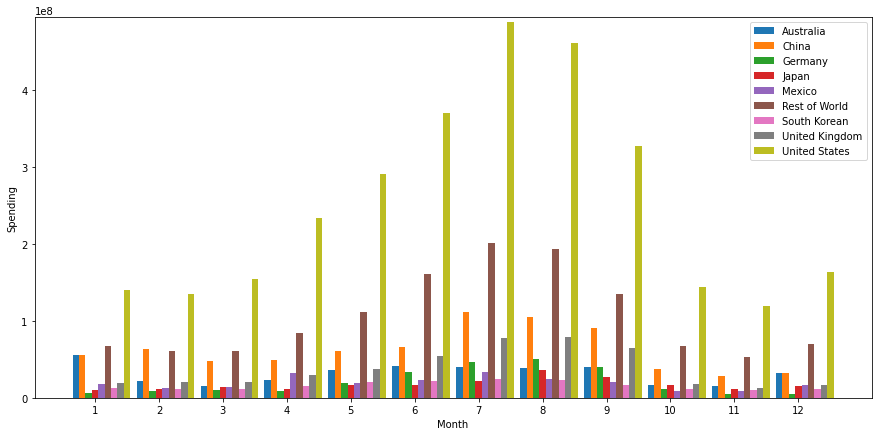

In [115]:
year = 2019
plot_spending_country(df, year, domestic=False)

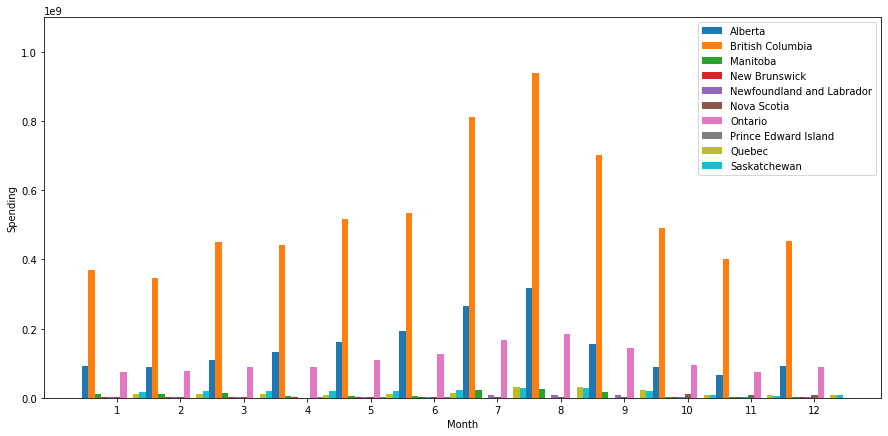

In [101]:
year = 2019
plot_spending_country(df, year, domestic=True)

Reorder
Separate BC on a different plot

## PLOT 4: Spending by item

In [116]:
def plot_spending_item(df, origin, year):

    df_plt = df[(df['Destination Province'] == 'British Columbia') & (df['Year'] == year) & (df['Origin Country'] == origin)].\
    groupby(['Origin Country', 'Date', 'ITS Spend Category Name'])['Spend'].sum().reset_index()
    df_plt['Month'] = df_plt['Date'].apply(lambda x: int(x[5:7]))
    
    fig=plt.figure(figsize=(15,7))
    
    #max_val = df['Spend'].max()+(df['Spend'].max()*0.1)
    max_val = 200000000
    
    wd = 0.13
    pos = wd*-3
    #cat=df_plt['ITS Spend Category Name'].unique()
    cat = ['Accommodation', 'Food and Beverage','Transportation',\
           'Recreation and Entertainment', 'Clothes and Gifts', 'Others (Souvenirs, Shopping, Etc.)']
    
    
    for i in range(len(cat)):
        df_ax = df_plt[df_plt['ITS Spend Category Name'] == cat[i]]
        
        plt.bar(df_ax['Month']+pos, df_ax['Spend'], wd)
        plt.ylim((0, max_val*1.1))
        pos = pos+wd
        
    plt.xticks(range(1,13))
    plt.xlabel("Month")
    plt.ylabel("Spending")
    plt.legend(cat)
    plt.show()